In [61]:
import pandas as pd
data = pd.read_csv('finalData.csv',index_col=0)
data = data.drop(['NOC','Year'],axis=1)
data

,Medal,Event_Count,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Male_Percentage,is_Host?
0,0,4,0,0,0,0,0,0,0,0,0,100.000000,0.0
1,0,2,0,0,0,0,0,0,0,0,0,100.000000,0.0
2,0,1,0,0,0,0,0,0,0,0,0,100.000000,0.0
3,0,13,0,0,0,0,0,0,0,0,0,100.000000,0.0
4,0,8,0,0,0,0,0,0,0,0,0,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,9,15,0,0,0,0,0,9,0,0,0,50.000000,0.0
3255,0,8,0,0,0,0,0,0,0,0,0,44.444444,0.0
3256,0,13,0,0,0,0,0,0,0,0,0,29.032258,0.0
3257,0,5,0,0,0,0,0,0,0,0,0,80.000000,0.0


In [62]:
from sklearn.preprocessing import StandardScaler
import numpy as np
newData = data.loc[:, data.columns].values
newData = StandardScaler().fit_transform(newData) # normalizing the features
newData = np.nan_to_num(newData,nan=0)
newData

array([[-0.36087219, -0.64892695, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       [-0.36087219, -0.68947789, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       [-0.36087219, -0.70975335, -0.06667666, ..., -0.31258529,
         1.15793467, -0.10114043],
       ...,
       [-0.36087219, -0.46644774, -0.06667666, ..., -0.31258529,
        -0.75819802, -0.10114043],
       [-0.36087219, -0.62865148, -0.06667666, ..., -0.31258529,
         0.61793364, -0.10114043],
       [-0.36087219, -0.60837601, -0.06667666, ..., -0.31258529,
         0.38650463, -0.10114043]], shape=(3259, 13))

In [63]:
normalized = pd.DataFrame(newData,columns=data.columns)
normalized

,Medal,Event_Count,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Male_Percentage,is_Host?
0,-0.360872,-0.648927,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
1,-0.360872,-0.689478,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
2,-0.360872,-0.709753,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
3,-0.360872,-0.466448,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
4,-0.360872,-0.567825,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,1.157935,-0.10114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,-0.081761,-0.425897,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,0.010778,-0.119152,-0.047424,-0.312585,-0.192068,-0.10114
3255,-0.360872,-0.567825,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,-0.342068,-0.10114
3256,-0.360872,-0.466448,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,-0.758198,-0.10114
3257,-0.360872,-0.628651,-0.066677,-0.162313,-0.123052,-0.174741,-0.207112,-0.348860,-0.119152,-0.047424,-0.312585,0.617934,-0.10114


In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pc_lst = pca.fit_transform(normalized)
pc_df = pd.DataFrame(pc_lst, columns = ['PC1', 'PC2','PC3','PC4','PC5'])
pc_df

,PC1,PC2,PC3,PC4,PC5
0,-0.823923,0.285137,0.290986,0.855071,0.381488
1,-0.839083,0.287305,0.292418,0.846359,0.381994
2,-0.846663,0.288389,0.293134,0.842004,0.382246
3,-0.755702,0.275380,0.284543,0.894270,0.379213
4,-0.793603,0.280800,0.288122,0.872493,0.380477
...,...,...,...,...,...
3254,-0.544001,-0.027059,-0.093571,-0.130423,-0.131488
3255,-0.867143,-0.097799,-0.063223,-0.343031,-0.091770
3256,-0.849645,-0.208250,-0.164273,-0.658464,-0.224045
3257,-0.842818,0.147757,0.163786,0.421837,0.211226


In [65]:
pca_comps = pd.DataFrame(pca.components_, index= ['PC1', 'PC2','PC3','PC4','PC5'])
pca_comps

,0,1,2,3,4,5,6,7,8,9,10,11,12
PC1,0.427348,0.373855,0.101820,0.300947,0.253430,0.234523,0.322738,0.398873,0.174956,0.074324,0.334416,0.049027,0.209311
PC2,0.054578,-0.053470,0.510527,-0.357503,-0.056551,-0.016044,-0.114043,0.070168,-0.439416,-0.342637,0.277401,0.252399,0.364950
PC3,-0.067512,-0.035311,0.352896,-0.000757,-0.249254,-0.160599,-0.238517,-0.115748,0.396046,0.652877,0.169888,0.234230,0.211247
PC4,0.062903,0.214818,-0.316225,0.040254,-0.055269,-0.278723,-0.070246,0.119593,-0.078530,-0.059958,0.016426,0.810348,-0.285664
PC5,-0.090304,-0.012466,0.089741,-0.148714,-0.363628,0.714614,0.349519,-0.166748,0.152864,-0.053167,-0.191775,0.314831,-0.081016


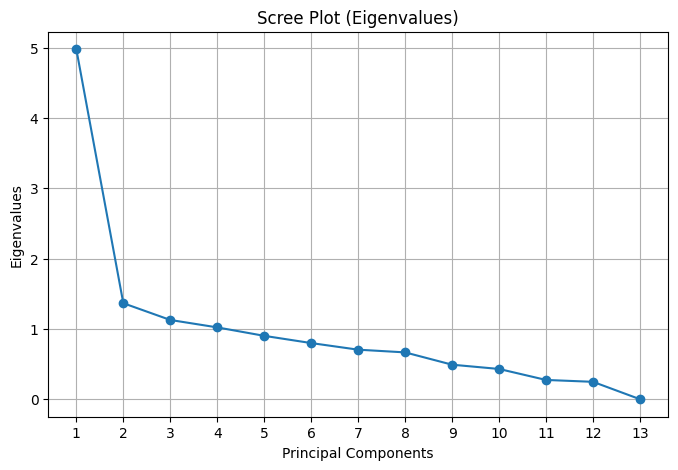

In [66]:
# Compute the covariance matrix
cov_matrix = np.cov(normalized, rowvar=False)

# Perform eigenvalue decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Create a scree plot with eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Scree Plot (Eigenvalues)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.xticks(range(1, len(sorted_eigenvalues) + 1))
plt.grid(True)
plt.show()

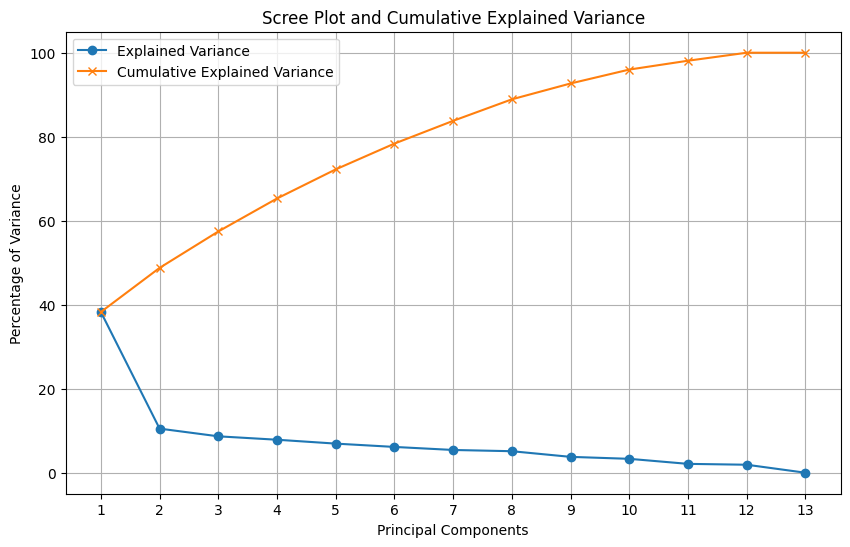

In [67]:
pca = PCA()
pca.fit(normalized)

# Explained variance ratio (percentage of variance)
explained_variance = pca.explained_variance_ratio_ * 100

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Create a combined plot with the scree plot and the cumulative explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='x', label='Cumulative Explained Variance')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.legend()
plt.show()